In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import openweathermapy.core as owm
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

In [ ]:
cities

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
City_Name = []          
Cloudiness = []   
Country = []       
Date = []          
Humidity = []     
Lat = []          
Lng = []          
Max_Temp = []     
Wind_Speed = []

In [5]:
# call counter 
record = 1



# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop
for city in cities:  
    
    # Try statement to append calls
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        City_Name.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Wind_Speed.append(response["wind"]["speed"])
        City_Record = response["name"]
        print(f"Processing Record {record} | {city}")
      

        record= record + 1 
        
    # If no record found "skip" to next call
    except:
        print(f"Missing field/result... skipping.{city}")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | snezhnogorsk
Processing Record 2 | dikson
Processing Record 3 | upernavik
Processing Record 4 | mataura
Processing Record 5 | bluff
Processing Record 6 | fairfield
Processing Record 7 | jenbach
Processing Record 8 | nikolskoye
Processing Record 9 | busselton
Processing Record 10 | barrow
Processing Record 11 | leh
Processing Record 12 | victoria
Processing Record 13 | clyde river
Processing Record 14 | punta arenas
Processing Record 15 | lebu
Processing Record 16 | rikitea
Processing Record 17 | omboue
Processing Record 18 | hithadhoo
Processing Record 19 | pierre
Processing Record 20 | tiksi
Processing Record 21 | cabedelo
Processing Record 22 | jinchang
Processing Record 23 | hermanus
Processing Record 24 | liku
Processing Record 25 | lagoa
Processing Record 26 | luderitz
Processing Record 27 | longyearbyen
Missing field/result... skipping.amderma
Processing Record 28 | butaritari
Processing Record 29 | ar

Processing Record 223 | santiago de cao
Processing Record 224 | awjilah
Processing Record 225 | broome
Processing Record 226 | kiunga
Processing Record 227 | samarai
Processing Record 228 | new norfolk
Processing Record 229 | santa lucia
Missing field/result... skipping.igarape-acu
Processing Record 230 | portland
Processing Record 231 | sicuani
Missing field/result... skipping.sentyabrskiy
Processing Record 232 | jhang
Processing Record 233 | neiafu
Processing Record 234 | avera
Processing Record 235 | cherskiy
Missing field/result... skipping.grand river south east
Processing Record 236 | colac
Processing Record 237 | coihaique
Processing Record 238 | severo-kurilsk
Processing Record 239 | north branch
Processing Record 240 | aykhal
Processing Record 241 | bethanien
Processing Record 242 | katsuura
Processing Record 243 | port blair
Processing Record 244 | ponta do sol
Processing Record 245 | norman wells
Processing Record 246 | aswan
Processing Record 247 | port lincoln
Processing R

Processing Record 442 | rocha
Processing Record 443 | hirara
Missing field/result... skipping.xadani
Processing Record 444 | newport
Processing Record 445 | umm lajj
Processing Record 446 | dzerzhinskoye
Processing Record 447 | naze
Processing Record 448 | salalah
Processing Record 449 | kristiansund
Missing field/result... skipping.asfi
Processing Record 450 | quelimane
Processing Record 451 | keti bandar
Missing field/result... skipping.qibili
Processing Record 452 | cuamba
Missing field/result... skipping.labrea
Processing Record 453 | churapcha
Processing Record 454 | vestmanna
Processing Record 455 | alugan
Processing Record 456 | benbrook
Processing Record 457 | lodwar
Processing Record 458 | izmit
Processing Record 459 | malindi
Processing Record 460 | san cristobal
Processing Record 461 | woodward
Processing Record 462 | chilca
Missing field/result... skipping.atsiki
Processing Record 463 | mmabatho
Processing Record 464 | port-cartier
Missing field/result... skipping.labutta
P

In [6]:
column_names = {"City": City_Name,
    "Cloudiness":Cloudiness, 
    "Country":Country,
    "Date":Date, 
    "Humidity": Humidity,
    "Lat":Lat, 
    "Lng":Lng, 
    "Max Temp": Max_Temp,
    "Wind Speed":Wind_Speed}

In [7]:
df = pd.DataFrame(column_names)

In [8]:
df.shape

(530, 9)

In [9]:
df.count()

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind Speed    530
dtype: int64

In [10]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Snezhnogorsk,0,RU,1540927800,85,69.19,33.23,12.20,2.24
1,Dikson,64,RU,1540930309,100,73.51,80.55,25.92,11.43
2,Upernavik,76,GL,1540930309,100,72.79,-56.15,19.53,5.50
3,Mataura,20,NZ,1540930309,83,-46.19,168.86,46.08,4.83
4,Bluff,92,AU,1540930309,97,-23.58,149.07,67.73,13.44


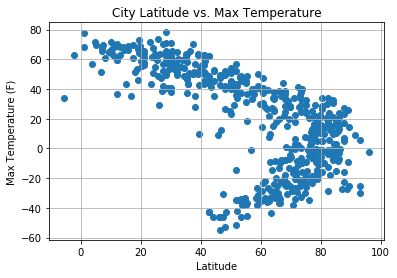

In [13]:
plt.scatter(df['Max Temp'], df['Lat'])

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Max Temperature")
plt.grid(True)

plt.savefig("../Images/LatitudeVsMaxTemperature.png")

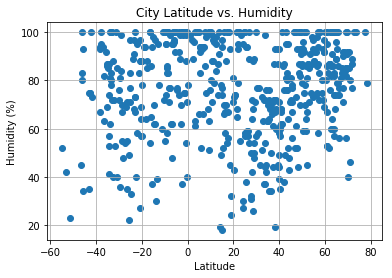

In [14]:
plt.scatter(df['Lat'], df['Humidity'])

plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../Images/LatitudeVsHumidity.png")

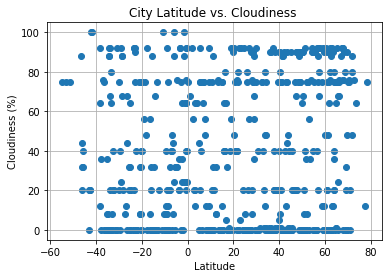

In [15]:
plt.scatter(df['Lat'], df['Cloudiness'])

plt.title(f"City Latitude vs. Cloudiness ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../Images/LatitudeVsCloudiness.png")

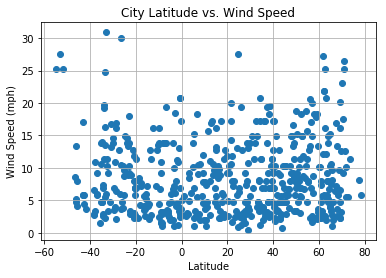

In [16]:
plt.scatter(df['Lat'], df['Wind Speed'])

plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("../Images/LatitudeVsWindSpeed.png")